# Example 02: General Use of XGBoostCVClassifier

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/classification.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/home/amirhessam/Documents/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.classification import XGBoostCVClassifier

-----
# XGBoostCVClassifier Docstring

In [5]:
help(XGBoostCVClassifier)

Help on class XGBoostCVClassifier in module slickml.classification:

class XGBoostCVClassifier(XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round=None, n_splits=None, metrics=None, early_stopping_rounds=None, random_state=None, stratified=True, shuffle=True, sparse_matrix=False, scale_mean=False, scale_std=False, importance_type=None, params=None, callbacks=False, verbose=True)
 |  
 |  XGBoost CV Classifier.
 |  This is subclass of XGBoostClassifier to run xgboost.cv()
 |  model with n-folds cross-validation and train model based on
 |  the best number of boosting round to avoid over-fitting. This
 |  function is pretty useful when feature selection is done and you
 |  want to train a model on the whole data and test on a separate
 |  validation set. In this case, cross-validation part on the train
 |  set decrease the possibility of over-fitting.
 |  run xgboost.train(). Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html

## Example

In [6]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [7]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [24]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("logloss"),
                          params=params,
                          callbacks=True)
clf.fit(X_train, y_train)

[0]	train-logloss:0.67574+0.00105	test-logloss:0.67692+0.00089
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.65836+0.00108	test-logloss:0.66033+0.00106
[2]	train-logloss:0.64180+0.00173	test-logloss:0.64486+0.00156
[3]	train-logloss:0.62629+0.00266	test-logloss:0.63071+0.00240
[4]	train-logloss:0.61075+0.00276	test-logloss:0.61588+0.00247
[5]	train-logloss:0.59565+0.00304	test-logloss:0.60142+0.00252
[6]	train-logloss:0.58136+0.00362	test-logloss:0.58756+0.00325
[7]	train-logloss:0.56721+0.00361	test-logloss:0.57390+0.00393
[8]	train-logloss:0.55437+0.00420	test-logloss:0.56174+0.00420
[9]	train-logloss:0.54177+0.00438	test-logloss:0.54971+0.00461
[10]	train-logloss:0.52957+0.00410	test-logloss:0.53816+0.00526
[11]	train-logloss:0.51830+0.00464	test-logloss:0.52761+0.00625
[12]	train-logloss:0.50771+0.00562	test-logloss:0.51847+0.00618
[13]	train-logloss:0.49791+0.

[126]	train-logloss:0.25952+0.00778	test-logloss:0.32502+0.01918
[127]	train-logloss:0.25905+0.00787	test-logloss:0.32502+0.01911
[128]	train-logloss:0.25848+0.00773	test-logloss:0.32462+0.01915
[129]	train-logloss:0.25784+0.00764	test-logloss:0.32418+0.01918
[130]	train-logloss:0.25735+0.00763	test-logloss:0.32414+0.01909
[131]	train-logloss:0.25675+0.00751	test-logloss:0.32384+0.01902
[132]	train-logloss:0.25607+0.00749	test-logloss:0.32355+0.01951
[133]	train-logloss:0.25566+0.00751	test-logloss:0.32350+0.01929
[134]	train-logloss:0.25509+0.00743	test-logloss:0.32326+0.01921
[135]	train-logloss:0.25463+0.00744	test-logloss:0.32307+0.01932
[136]	train-logloss:0.25419+0.00750	test-logloss:0.32317+0.01953
[137]	train-logloss:0.25379+0.00753	test-logloss:0.32272+0.01954
[138]	train-logloss:0.25322+0.00748	test-logloss:0.32289+0.01971
[139]	train-logloss:0.25269+0.00748	test-logloss:0.32283+0.02038
[140]	train-logloss:0.25224+0.00750	test-logloss:0.32303+0.02069
[141]	train-logloss:0.251

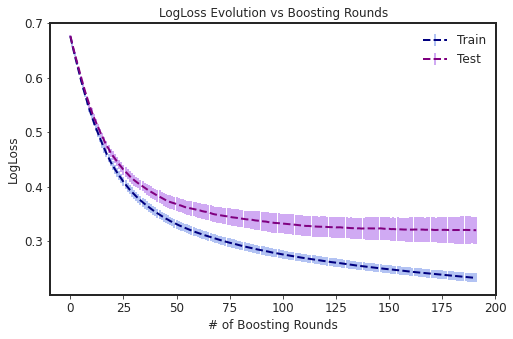

In [10]:
clf.plot_cv_results()

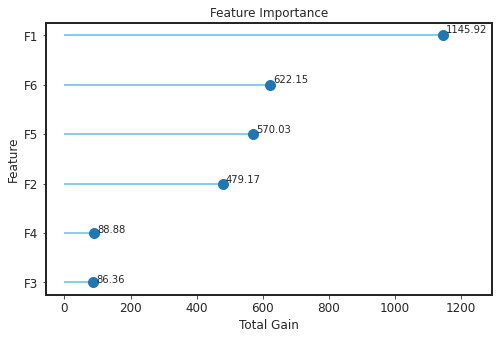

In [11]:
clf.plot_feature_importance()

In [12]:
# predic proba (or clf.y_pred_proba_)
y_pred_proba = clf.predict_proba(X_test, y_test)
y_pred_proba[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

In [13]:
# (or clf.y_pred_proba_)
clf.y_pred_proba_[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

In [14]:
# pred class (or clf.y_pred_)
# threshold can be set 
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

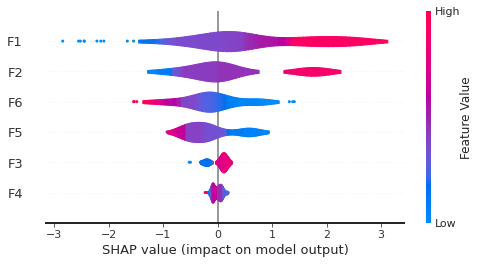

In [15]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

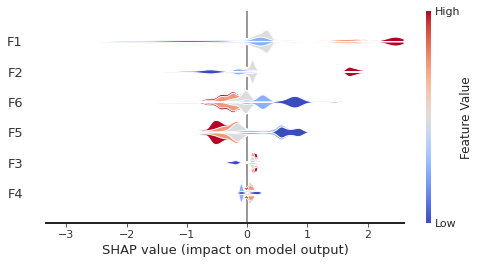

In [16]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(plot_type="layered_violin", validation=False, layered_violin_max_num_bins=5)

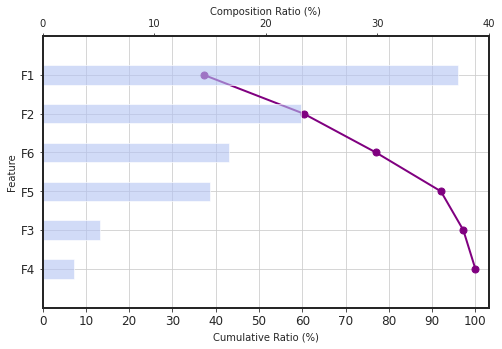

In [17]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [18]:
clf.shap_values_test_[:10]

array([[-1.17578661e+00, -5.86567044e-01,  2.24011347e-01,
         1.57289244e-02,  5.16849458e-01,  1.82012349e-01],
       [ 2.63391405e-01, -6.70697689e-01, -3.13290775e-01,
        -2.99329627e-02, -1.77391380e-01, -9.14573073e-02],
       [ 1.92844176e+00,  1.65123546e+00,  6.71078265e-02,
        -1.91674568e-04, -4.64400291e-01, -2.17012703e-01],
       [ 1.73300028e+00,  5.55277169e-02,  7.87695572e-02,
         7.93843195e-02, -5.03318131e-01, -6.46094084e-01],
       [-8.95560607e-02, -1.23228216e+00, -3.07602823e-01,
        -7.56613836e-02,  5.68822742e-01,  9.30051088e-01],
       [ 2.82156050e-01, -1.97538398e-02, -2.15325534e-01,
         6.93768915e-03, -1.98684931e-01, -1.11096114e-01],
       [ 2.41128638e-01, -9.37509894e-01,  1.55264497e-01,
        -3.11029796e-03, -2.40322769e-01, -1.19882606e-01],
       [ 3.48925084e-01,  6.94350719e-01,  7.06390738e-02,
         5.83638158e-03, -1.72579139e-01, -9.74345058e-02],
       [ 2.96836704e-01,  1.69714773e+00,  1.374

In [19]:
clf.shap_values_train_[:10]

array([[ 1.6810727 ,  1.8670248 , -0.12494415, -0.11206084, -0.5291322 ,
        -0.4470591 ],
       [ 0.20235999, -0.23255867,  0.05476505,  0.06951104, -0.21339028,
        -0.4764193 ],
       [ 0.15221135, -1.1012809 , -0.32120004,  0.01052977,  0.04009805,
         0.23228301],
       [ 2.3585417 ,  1.646324  ,  0.06655529, -0.08806157, -0.11101343,
         0.0118833 ],
       [ 2.3252146 ,  0.07344273,  0.06707823,  0.1696119 , -0.47139165,
        -1.3900161 ],
       [ 1.6970465 ,  1.8670248 , -0.12494415, -0.07160836, -0.5291322 ,
        -0.4470591 ],
       [ 1.6877612 ,  0.63464016,  0.06441025, -0.0825933 , -0.2945922 ,
        -0.23303552],
       [ 0.25127745,  0.03300017,  0.15304364, -0.10549548, -0.1993008 ,
         0.8770816 ],
       [ 0.12158564, -0.06782506,  0.08321874,  0.01529711,  0.55117816,
         0.2280842 ],
       [ 0.18574946, -1.0985618 ,  0.1552645 ,  0.02025529, -0.2360702 ,
        -0.43954518]], dtype=float32)

In [20]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
187,0.233434,0.008174,0.320090,0.025060
188,0.233021,0.008195,0.320024,0.024866
189,0.232621,0.008224,0.320062,0.024701
190,0.232216,0.008193,0.319890,0.024903
191,0.231895,0.008241,0.319651,0.024945


In [21]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1145.921151
1,F6,622.148287
2,F5,570.030153
3,F2,479.170822
4,F4,88.880518
5,F3,86.359118


In [22]:
clf.model_